# MULTILAYER PERCEPTRON

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
data = pd.read_csv("C:\\Users\\Charan\\Downloads\\dataR2.csv")
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [5]:
data.describe(include = 'all')

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [6]:
X = data.drop('Classification', axis=1)
y = data['Classification']
print(X.head(2))
print(y.head(2))

   Age        BMI  Glucose  Insulin      HOMA  Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409  8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897  8.8438     5.429285   4.06405   

     MCP.1  
0  417.114  
1  468.786  
0    1
1    1
Name: Classification, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
print(X_train.shape)
print(y_test.shape)

(81, 9)
(35,)


In [8]:
from sklearn.neural_network import MLPClassifier

In [14]:
mlp = MLPClassifier(max_iter=100, activation='relu')
mlp

MLPClassifier(max_iter=100)

In [15]:
mlp.fit(X_train,y_train)

C:\Users\Charan\anaconda34\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=100)

In [16]:
pred = mlp.predict(X_test)
pred

array([2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2], dtype=int64)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_test,pred)

array([[ 6, 10],
       [ 3, 16]], dtype=int64)

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.67      0.38      0.48        16
           2       0.62      0.84      0.71        19

    accuracy                           0.63        35
   macro avg       0.64      0.61      0.60        35
weighted avg       0.64      0.63      0.61        35



# LOGISTIC REGRESSION

In [19]:
from sklearn import linear_model
regress=linear_model.LogisticRegression()
data2=data.values
train_x=(data2[:,0:8])
train_y=data2[:,9]
print(train_x.shape)
print(train_y.shape)

(116, 8)
(116,)


In [24]:
from sklearn.preprocessing import MinMaxScaler
a=MinMaxScaler()
train_x=a.fit_transform(train_x)
#print(train_x)

In [21]:
regress.fit(train_x,train_y)
print("co-efficient:",regress.coef_)
print("Intercept:",regress.intercept_)

co-efficient: [[-0.38660206 -0.96633343  1.93443101  1.13287813  0.89440704 -0.15942194
  -0.14655935  1.13199623]]
Intercept: [0.04698986]


In [25]:
y_predicted=regress.predict(train_x)
#for i in range(0,len(train_x)):
    #print(train_y[i],y_predicted[i])
data['pred']=y_predicted
data


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,pred
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,1.0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,2.0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,1.0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,2.0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,1.0
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,1.0
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,1.0
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,1.0


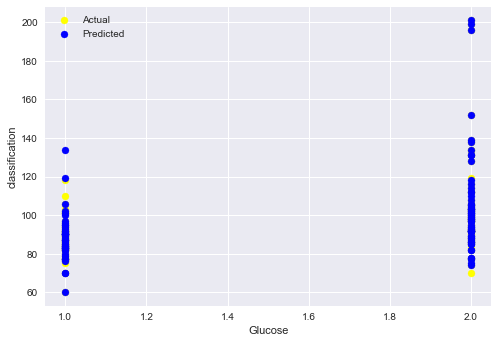

In [26]:
import matplotlib.pyplot as plt
plt.scatter(data['Classification'],data['Glucose'],color='yellow',label='Actual')
plt.scatter(data['pred'],data['Glucose'],color='blue',label='Predicted')
plt.xlabel('Glucose')
plt.ylabel('classification')
plt.legend()
plt.show()

In [27]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(train_y,y_predicted))
print('confusion matrix:',metrics.confusion_matrix(train_y,y_predicted))


Accuracy: 0.7155172413793104
confusion matrix: [[33 19]
 [14 50]]


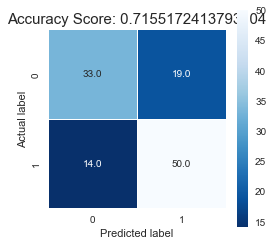

In [29]:
import seaborn as sb
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(train_y,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(train_y, y_predicted))
plt.title(all_sample_title, size = 15);

In [30]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_predicted))

              precision    recall  f1-score   support

         1.0       0.70      0.63      0.67        52
         2.0       0.72      0.78      0.75        64

    accuracy                           0.72       116
   macro avg       0.71      0.71      0.71       116
weighted avg       0.71      0.72      0.71       116



# DECISION TREE

In [31]:
X=df.iloc[:,:9]
Y=df.iloc[:,9]
X=np.array(X)
Y=np.array(Y)

In [32]:
X

array([[ 48.        ,  23.5       ,  70.        , ...,   9.7024    ,
          7.99585   , 417.114     ],
       [ 83.        ,  20.69049454,  92.        , ...,   5.429285  ,
          4.06405   , 468.786     ],
       [ 82.        ,  23.12467037,  91.        , ...,  22.43204   ,
          9.27715   , 554.697     ],
       ...,
       [ 65.        ,  32.05      ,  97.        , ...,  22.54      ,
         10.33      , 314.05      ],
       [ 72.        ,  25.59      ,  82.        , ...,  33.75      ,
          3.27      , 392.46      ],
       [ 86.        ,  27.18      , 138.        , ...,  14.11      ,
          4.35      ,  90.09      ]])

In [33]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [34]:
df.shape

(116, 10)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy')

In [40]:
from IPython.display import Image
import pydotplus

In [39]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=5d669c50786d545501a3c67302e12072af92586be3bc4780ab467a37d7b0564e
  Stored in directory: c:\users\charan\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [44]:
predict=tree.predict(X)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [45]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y,predict))

Accuracy: 1.0


# NAIVE BAYES

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB

In [57]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:8],df.iloc[:,9],test_size=0.2,random_state=2)
print(X_train)
print(X_test)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
81    81  31.640368      100    9.669  2.385020  38.8066    10.636525   
35    67  29.606767       79    5.819  1.133929  21.9033     2.194280   
21    34  31.975015       87    4.530  0.972138  28.7502     7.642760   
16    47  22.030000       84    2.869  0.590000  26.6500    38.040000   
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
..   ...        ...      ...      ...       ...      ...          ...   
22    29  32.270788       84    5.810  1.203832  45.6196     6.209635   
72    51  18.370000      105    6.030  1.561770   9.6200    12.760000   
109   75  30.480000      152    7.010  2.628283  50.5300    10.060000   
15    44  20.760000       86    7.553  1.600000  14.0900    20.320000   
40    76  29.218408       83    5.376  1.100646  28.5620     7.369960   

     Resistin  
81   29.55830  
35    4.20750  
21    5.62592  
16    3.32000  
0     7.99585  
..        ...  
22   24.603

In [58]:
print(y_train)
print(y_test)

81     2
35     1
21     1
16     1
0      1
      ..
22     1
72     2
109    2
15     1
40     1
Name: Classification, Length: 92, dtype: int64
24     1
89     2
28     1
56     2
2      1
53     2
45     1
79     2
61     2
30     1
44     1
25     1
106    2
100    2
13     1
14     1
101    2
91     2
5      1
73     2
41     1
60     2
29     1
11     1
Name: Classification, dtype: int64


In [59]:
cnb=CategoricalNB()

In [60]:
cnb.fit(X_train,y_train)
y_predict=cnb.predict(X_test)
print(y_predict)

[2 2 2 2 1 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1]


In [61]:
print("Number of mislabeled points out of a total %d points :%r"%(X_test.shape[0],y_test!=y_predict))

Number of mislabeled points out of a total 24 points :24      True
89     False
28      True
56     False
2      False
53     False
45     False
79      True
61      True
30     False
44      True
25      True
106    False
100     True
13     False
14     False
101     True
91     False
5      False
73      True
41     False
60      True
29     False
11     False
Name: Classification, dtype: bool


In [62]:
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test,y_predict))
print('confusion matrix: \n',metrics.confusion_matrix(y_test,y_predict))

Accuracy:  0.5833333333333334
confusion matrix: 
 [[9 4]
 [6 5]]


# KNN - CLASSIFIER

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:9],df.iloc[:,9],test_size=0.2)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
df1=pd.DataFrame(X_train)
df2=pd.DataFrame(X_test)
res=pd.concat([df1,df2],axis=1)
print(res)

      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     NaN        NaN      NaN      NaN       NaN      NaN          NaN   
1    83.0  20.690495     92.0    3.115  0.706897   8.8438     5.429285   
2    82.0  23.124670     91.0    4.498  1.009651  17.9393    22.432040   
3    68.0  21.367521     77.0    3.226  0.612725   9.8827     7.169560   
4    86.0  21.111111     92.0    3.549  0.805386   6.6994     4.819240   
..    ...        ...      ...      ...       ...      ...          ...   
111  45.0  26.850000     92.0    3.330  0.755688  54.6800    12.100000   
112   NaN        NaN      NaN      NaN       NaN      NaN          NaN   
113  65.0  32.050000     97.0    5.730  1.370998  61.4800    22.540000   
114  72.0  25.590000     82.0    2.820  0.570392  24.9600    33.750000   
115  86.0  27.180000    138.0   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1   Age    BMI  Glucose  Insulin      HOMA   Leptin  \
0         NaN      NaN  48.0  23.50

In [65]:
df3=pd.DataFrame(y_train)

In [66]:
Clusters=[]
Accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    Clusters.append(i)
    Accuracy.append(metrics.accuracy_score(y_test,y_pred))
print(Clusters)
print(Accuracy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.6666666666666666, 0.5416666666666666, 0.625, 0.5833333333333334, 0.4583333333333333, 0.625, 0.5416666666666666, 0.625, 0.625, 0.7083333333333334, 0.7083333333333334, 0.625, 0.5416666666666666, 0.625, 0.4583333333333333, 0.4583333333333333, 0.5416666666666666, 0.5, 0.5416666666666666, 0.6666666666666666]


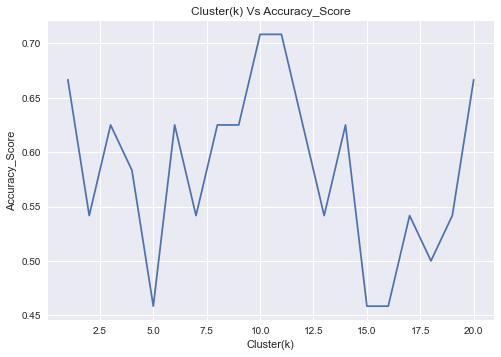

In [67]:
plt.title("Cluster(k) Vs Accuracy_Score")
plt.xlabel("Cluster(k)")
plt.ylabel("Accuracy_Score")
plt.plot(Clusters,Accuracy)
plt.show()

# GRADIENT - BOOSTING ALGORITHM

In [102]:
from sklearn. ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error

In [103]:
X=df.iloc[:,:9]
Y=df.iloc[:,9]
X=np.array(X)
Y=np.array(Y)

In [104]:
X

array([[ 48.        ,  23.5       ,  70.        , ...,   9.7024    ,
          7.99585   , 417.114     ],
       [ 83.        ,  20.69049454,  92.        , ...,   5.429285  ,
          4.06405   , 468.786     ],
       [ 82.        ,  23.12467037,  91.        , ...,  22.43204   ,
          9.27715   , 554.697     ],
       ...,
       [ 65.        ,  32.05      ,  97.        , ...,  22.54      ,
         10.33      , 314.05      ],
       [ 72.        ,  25.59      ,  82.        , ...,  33.75      ,
          3.27      , 392.46      ],
       [ 86.        ,  27.18      , 138.        , ...,  14.11      ,
          4.35      ,  90.09      ]])

In [113]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,Y)

In [115]:
regressor=GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [116]:
errors=[mean_squared_error(Y,y_pred) for y_pred in regressor.staged_predict(X)]
best_n_estimators=np.argmin(errors)

In [117]:
best_regressor=GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor. fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=2)

In [118]:
y_pred=best_regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.3949130489057893

In [125]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:9], X[9:]
y_train, y_test = y[:9], y[9:]

In [127]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
 max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5807689100158452

# OBSERVATION

Out of all algorithms the decision gives the mores accuracy . it takes the data from input and classify according to if - else rule ,remaining all algorithms also takes data as similar but they has do calculations by understanding the dataset so decision gives more accuracy. Multilayer layer perceptron has to gives more accuracy as it do backpropagation and calculation in hidden layers , when the max_iterations is 500 the system is gives accuracy 40% and when it is 100 it gives 70% it is changing according to max_iterations, In naive bayes classifier we have an accuracy 59% which is low , when we change hyper parameters like random state = 0, it gives an error so i kept as 2, In KNN classifier we have found 20 clusters in that 70% is maximum and the graph isnt constantly increasing which is some error in training, In gradient boosting also when we keep learning rate is 1 the model is predicting low accuracy and when we change 0.01 the model gives accuracy but the system suffers with high calculations  

# COMPLEXITY OF NEURAL NETWORKS WITH RESPECT TO HYPER PARAMETERS

All the hyper parameters will depend on dataset.if the dataset is small the learning has to happen slowly. so we cant give learning rate as 0.1 or 1.0 . if the dataset is have this happens vice versa. The momentum also as we know it should be 0.9 . And if we give random state as 0 , it will work properly for most of the datasets and some will doesn't work . So all these we can't predict what to choose at what time . if we give small values the model will suffer like anything .The complexity increases and it will take lot of time . so this can be hectic work to choose the parameters. By adding more layers and more units within a layer, a deep network can represent functions of increasing complexity ,Neural networks are complex linear functions with many parameters. 6. A perceptron adds up all the weighted inputs it receives, and if it exceeds a certain value, it outputs a 1, otherwise it just outputs a 0.Neural complexity deals with lower bounds for neural resources (numbers of neurons) needed by a network to perform a given task within a given tolerance. Information complexity measures lower bounds for the information (i.e. number of examples) needed about the desired input–output function. We study the interaction of the two complexities, and so lower bounds for the complexity of building and then programming feed-forward nets for given tasks. We show something unexpected a priori—the interaction of the two can be simply bounded, so that they can be studied essentially independently